### <center> Predict Credit Consumption of Customer For Leading Bank 🏦</center> 


### Steps that we will follow:
1. Introduction To Problem ❓
2. Identification of a Machine Learning type (Supervised, Unsupervised, Semi-Supervised, Reinforcement)🔎
2. Data Collection and Info 🛠
3. Exploratory Data Analysis📊
3. Data Preprocessing🧬
4. Split the dataset into train-test🌓
5. Model building 🏗
6. Metrics Evaluation📝
7. Model Selection ✔
7. Predict the data🎯

### Business Problem:

Analytics powers industries through diverse tech platforms gathering insights from sources, deciphering customer desires. The Credit Card sector, data-rich too, taps limitless ways to fathom consumer behavior. Credit card data reveals consumer types and spending patterns, fueling precise marketing campaigns that boost sales and revenue.

A leading bank aims to analyze three months of data (April, May, June) encompassing customer demographics, behavioral insights (liabilities, assets, transaction history), credit card spending for the past three months, and projected spending for the next three months (July, August, September). This endeavor underscores the bank's commitment to data-driven decision-making and strategic planning for enhancing customer experiences and managing credit consumption effectively.

### Identification of a Machine Learning type:

We have labeled datasets to train algorithms for outcome prediction. It is a Supervised Learning Machine Learning type. We have to predict the credit card consumption for next three months. So it a regression based problem.

### Data Collection and Information Analysis

#### Import required libraries

In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
# package for hypothesis testing or statistical testing
from scipy import stats
# package for statistical models
import statsmodels.formula.api as smf   # for statistical modelling
from sklearn.model_selection import train_test_split
# Model selection
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import AdaBoostRegressor, BaggingRegressor, RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
import xgboost as XGBRegressor 
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import LabelEncoder
# accuracy measures: mae, mape, mse, r2_score
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error, r2_score
import warnings
import math

In [65]:
warnings.filterwarnings('ignore')

#### Data Availability:

We have three excel file. We will import the files and merge the files to create one dataset.

In [66]:
# Import credit consumption data
ccd = pd.read_excel("E:\\CS\\DS360\\DS360-20230716T150307Z-001\\DS360\\Data Science 360\\Data Science 360\\Machine Learning\\Case Studies\\Evaluation Case Study\\Predict Cred Card Consumption\\CreditConsumptionData.xlsx")

In [67]:
ccd.shape

(20000, 2)

In [68]:
ccd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   ID       20000 non-null  int64  
 1   cc_cons  15000 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 312.6 KB


In [69]:
# Import consumer behavior data
cbd = pd.read_excel("E:\\CS\\DS360\\DS360-20230716T150307Z-001\\DS360\\Data Science 360\\Data Science 360\\Machine Learning\\Case Studies\\Evaluation Case Study\\Predict Cred Card Consumption\\CustomerBehaviorData.xlsx")

In [70]:
cbd.shape # Check consumer behavior data dataframe shape

(20000, 39)

In [71]:
cbd.info() # Check consumer behavior data info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 39 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     20000 non-null  int64  
 1   cc_cons_apr            20000 non-null  float64
 2   dc_cons_apr            20000 non-null  float64
 3   cc_cons_may            19999 non-null  float64
 4   dc_cons_may            20000 non-null  float64
 5   cc_cons_jun            20000 non-null  float64
 6   dc_cons_jun            19999 non-null  float64
 7   cc_count_apr           19999 non-null  float64
 8   cc_count_may           20000 non-null  int64  
 9   cc_count_jun           20000 non-null  int64  
 10  dc_count_apr           20000 non-null  int64  
 11  dc_count_may           20000 non-null  int64  
 12  dc_count_jun           20000 non-null  int64  
 13  card_lim               20000 non-null  int64  
 14  personal_loan_active   20000 non-null  int64  
 15  ve

In [210]:
# Import Customer demographics
cust_demo = pd.read_excel("E:\\CS\\DS360\\DS360-20230716T150307Z-001\\DS360\\Data Science 360\\Data Science 360\\Machine Learning\\Case Studies\\Evaluation Case Study\\Predict Cred Card Consumption\\CustomerDemographics.xlsx")

In [211]:
cust_demo.shape # Check customer demographics data dataframe shape

(20000, 10)

In [212]:
cust_demo.info() # Check customer demographics data info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID                            20000 non-null  int64  
 1   account_type                  19999 non-null  object 
 2   gender                        19999 non-null  object 
 3   age                           20000 non-null  int64  
 4   Income                        19999 non-null  object 
 5   Emp_Tenure_Years              20000 non-null  float64
 6   Tenure_with_Bank              20000 non-null  int64  
 7   region_code                   19999 non-null  float64
 8   NetBanking_Flag               20000 non-null  int64  
 9   Avg_days_between_transaction  19997 non-null  float64
dtypes: float64(3), int64(4), object(3)
memory usage: 1.5+ MB


In [213]:
# Merge Data set
df1 = pd.merge(left = ccd, right =cbd , how = 'left', on = 'ID')

In [214]:
df1.shape

(20000, 40)

In [215]:
#Merge Dataset
df = pd.merge(left = df1, right =cust_demo , how = 'left', on = 'ID')

In [216]:
df.shape

(20000, 49)

In [217]:
df.head()

,ID,cc_cons,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,dc_cons_jun,cc_count_apr,cc_count_may,...,emi_active,account_type,gender,age,Income,Emp_Tenure_Years,Tenure_with_Bank,region_code,NetBanking_Flag,Avg_days_between_transaction
0,12554,20014.0,24893.00,378.00,10288.00,29664.00,16291.40,11432.00,2.0,26,...,1674.09,current,M,35,MEDIUM,15.0,1,708.0,0,17.0
1,17645,10173.0,18941.62,966.00,20672.00,287.00,4217.00,885.00,1.0,7,...,13043.34,current,M,35,HIGH,15.0,6,123.0,0,14.0
2,7604,16095.0,5678.87,2724.00,1964.50,3933.11,23956.25,5168.00,43.0,32,...,25375.27,current,M,55,MEDIUM,24.5,1,802.0,1,3.0
3,1590,7707.0,30489.50,1236.00,12609.88,9138.14,17521.00,13650.30,53.0,1,...,3544.33,current,F,29,MEDIUM,4.5,6,867.0,1,4.0
4,16556,96408.0,7441.40,6906.04,4364.00,1939.00,2121.00,6829.18,67.0,47,...,12780.44,current,M,34,MEDIUM,12.6,4,802.0,1,7.0


In [218]:
df.describe()

,ID,cc_cons,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,dc_cons_jun,cc_count_apr,cc_count_may,...,credit_count_jun,debit_count_jun,max_credit_amount_jun,emi_active,age,Emp_Tenure_Years,Tenure_with_Bank,region_code,NetBanking_Flag,Avg_days_between_transaction
count,20000.000000,15000.000000,20000.000000,20000.000000,1.999900e+04,20000.000000,20000.000000,19999.000000,19999.000000,20000.000000,...,20000.000000,20000.000000,2.000000e+04,1.999900e+04,20000.000000,20000.000000,20000.000000,19999.000000,20000.000000,19997.000000
mean,9999.500000,55157.729867,17856.990922,8130.453414,1.618836e+04,7702.427191,12135.806021,7109.708341,41.611631,33.569100,...,19.905450,44.529100,5.284985e+04,1.539887e+04,47.672300,15.217250,5.496050,598.959348,0.718000,11.044757
std,5773.647028,97670.972252,25158.878234,14572.188829,2.651068e+04,17892.731800,18790.984789,13313.935609,97.835475,50.316925,...,27.055323,35.080453,1.343175e+05,1.202541e+05,30.359771,20.481455,2.870452,220.105230,0.449985,5.480552
min,0.000000,0.000000,253.000000,19.350000,1.570000e+02,22.000000,65.000000,62.000000,1.000000,1.000000,...,1.000000,0.000000,6.000000e-02,0.000000e+00,25.000000,0.500000,1.000000,123.000000,0.000000,2.000000
25%,4999.750000,6768.000000,4377.000000,1624.650000,3.635910e+03,1634.260000,2999.075000,1361.100000,5.000000,8.000000,...,4.000000,12.000000,1.896450e+04,1.545940e+03,33.000000,5.100000,3.000000,424.000000,0.000000,6.000000
50%,9999.500000,13364.000000,10214.642500,3964.750000,8.635230e+03,3791.720000,6656.800000,3326.000000,10.000000,23.000000,...,7.000000,37.000000,3.025000e+04,3.934660e+03,40.000000,9.900000,6.000000,623.000000,1.000000,11.000000
75%,14999.250000,20105.750000,21189.000000,9339.020000,1.865531e+04,8263.590000,14195.727500,7458.820000,44.000000,43.000000,...,21.000000,73.000000,5.344900e+04,9.376390e+03,53.000000,18.000000,8.000000,799.000000,1.000000,16.000000
max,19999.000000,408382.000000,441031.330000,229255.000000,1.117246e+06,911223.490000,382914.100000,233384.000000,531.000000,601.000000,...,117.000000,133.000000,5.200000e+06,7.447125e+06,223.000000,203.000000,10.000000,974.000000,1.000000,20.000000


In [219]:
#Sorting 'target credit' values
df.sort_values(by='cc_cons', inplace=True)

In [220]:
df['cc_cons'].value_counts() # Check 'cc_cons' value counts

4262.0      5
6035.0      5
6203.0      5
13260.0     5
5602.0      5
           ..
11157.0     1
11162.0     1
11164.0     1
11165.0     1
408382.0    1
Name: cc_cons, Length: 12260, dtype: int64

In [221]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20000 entries, 13280 to 19999
Data columns (total 49 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID                            20000 non-null  int64  
 1   cc_cons                       15000 non-null  float64
 2   cc_cons_apr                   20000 non-null  float64
 3   dc_cons_apr                   20000 non-null  float64
 4   cc_cons_may                   19999 non-null  float64
 5   dc_cons_may                   20000 non-null  float64
 6   cc_cons_jun                   20000 non-null  float64
 7   dc_cons_jun                   19999 non-null  float64
 8   cc_count_apr                  19999 non-null  float64
 9   cc_count_may                  20000 non-null  int64  
 10  cc_count_jun                  20000 non-null  int64  
 11  dc_count_apr                  20000 non-null  int64  
 12  dc_count_may                  20000 non-null  int64  
 1

### Exploratory Data Analysis

In [222]:
df['cc_cons'].value_counts()

4262.0      5
6035.0      5
6203.0      5
13260.0     5
5602.0      5
           ..
11157.0     1
11162.0     1
11164.0     1
11165.0     1
408382.0    1
Name: cc_cons, Length: 12260, dtype: int64

In [223]:
#Divide the categorical and numerical data

df_cat = df.select_dtypes(include=['object'])
df_num = df.select_dtypes(include=['int64', 'float64'])

In [224]:
df_num[df_num < 0] = 0 # Get the negative values to zero

In [225]:
df = pd.concat([df_num,df_cat], axis=1) # Merge numerical and categorical data

In [226]:
# Create User Defined Function to check the outliers through visualization

def plot_box_dist(box_data, dist_data):
    # Create a figure with subplots
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))

    # Plot boxplot
    sns.boxplot(data=box_data, ax=axes[0], )
    axes[0].set_title('Box Plot')

    # Plot distribution plot
    sns.distplot(dist_data, ax=axes[1])
    axes[1].set_title('Distribution Plot')

    # Show the plots
    plt.show()

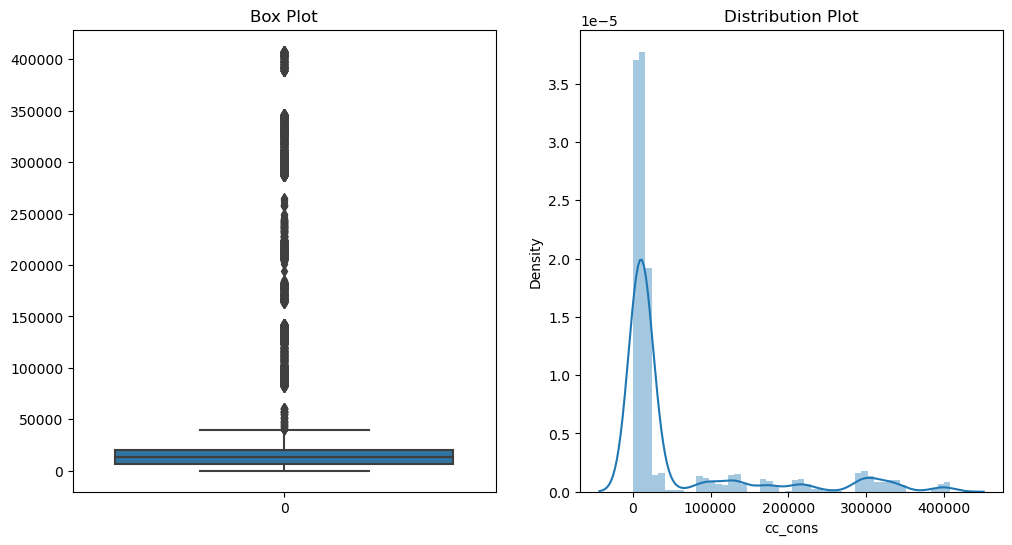

In [227]:
# Call the function to plot the data
plot_box_dist(df['cc_cons'], df['cc_cons'])

In [228]:
df['cc_cons'].skew() # Check the data skew value, it should be near to zero

2.126581960835585

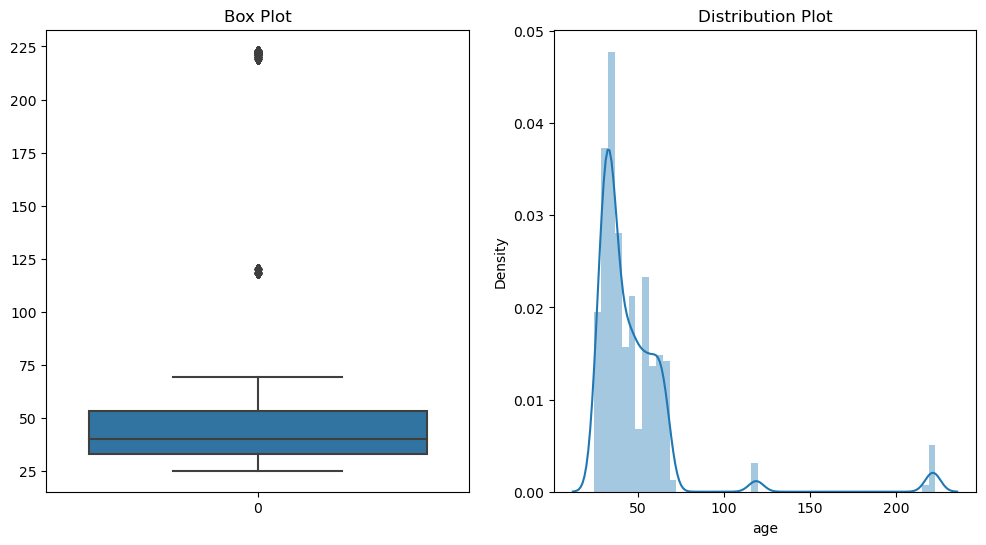

In [229]:
# Check the outlier in 'Age' feature
plot_box_dist(df['age'], df['age'])

In [230]:
df['age'].skew() # Check the Age feature skew value

4.400723586274227

In [231]:
## Data Distribution

(array([11882.,    52.,   565.,   451.,   309.,   400.,    14.,   789.,
          317.,   221.]),
 array([     0. ,  40838.2,  81676.4, 122514.6, 163352.8, 204191. ,
        245029.2, 285867.4, 326705.6, 367543.8, 408382. ]),
 <BarContainer object of 10 artists>)

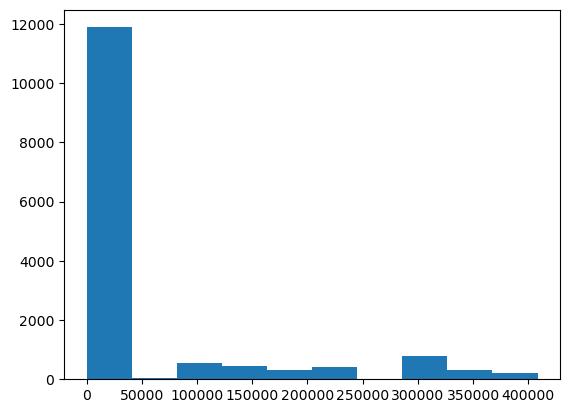

In [232]:
plt.hist(df['cc_cons'], bins=10)

<Axes: xlabel='gender', ylabel='count'>

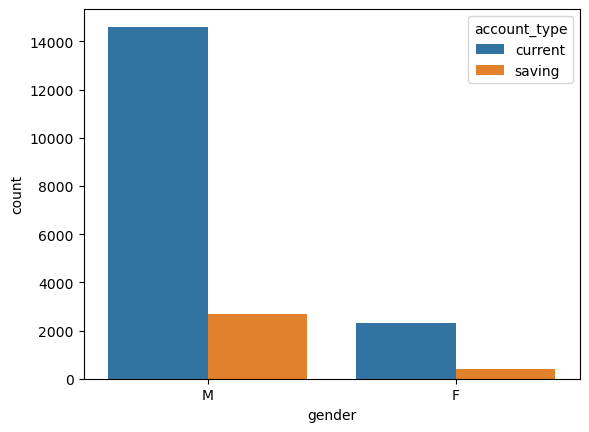

In [233]:
sns.countplot(x="gender", data=df,hue="account_type")

Males are having more accounts as compared to females including current and saving. Males and females both have more current accounts than saving accounts. 

<Axes: xlabel='gender', ylabel='count'>

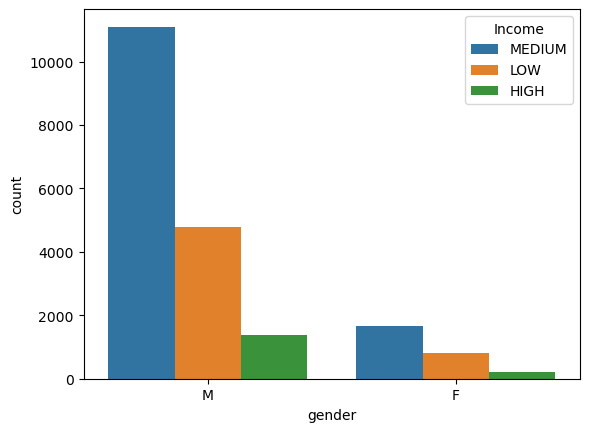

In [234]:
sns.countplot(x="gender", data=df,hue="Income")

Males incomes is more and higher than females in every income type.

<Axes: >

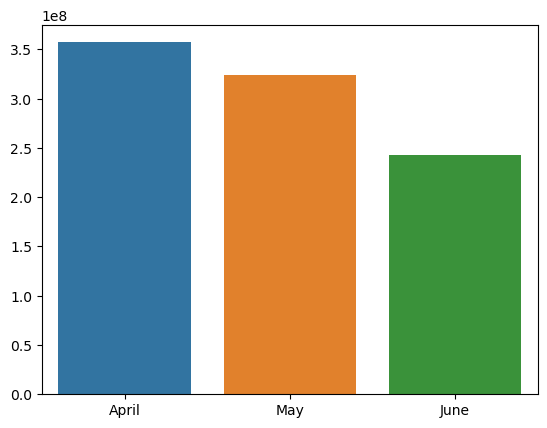

In [235]:
sns.barplot(x=["April", "May", "June"],y=[df['cc_cons_apr'].sum(),df['cc_cons_may'].sum(),df["cc_cons_jun"].sum()])

<Axes: >

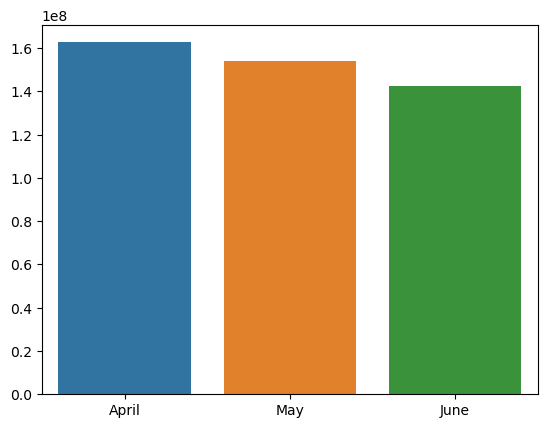

In [236]:
sns.barplot(x=["April", "May", "June"],y=[df["dc_cons_apr"].sum(),df['dc_cons_may'].sum(),df["dc_cons_jun"].sum()])

### Data Cleaning and Preprocessing

In [244]:
df_test_ID = df.loc[:, ['ID', 'cc_cons']] # storing IDs for which data is to be predicted

In [245]:
df_test_ID= df_test_ID[df_test_ID['cc_cons'].isna()]

In [246]:
df_test_ID.drop(columns='cc_cons', inplace=True)

In [247]:
df_test_ID = df_test_ID['ID']

In [248]:
df.drop(columns='ID', inplace=True) # Dropping the ID columns from main dataset

In [249]:
# Handling Outliers

# Create User defined function for handling outliers

def handling_outlier(feature):
    
    q1 = feature.quantile(q = 0.25)
    q3 = feature.quantile(q = 0.75)
    iqr = q3-q1
    uc = q3+(1.5*iqr)
    lc = q1-(1.5*iqr)
    feature = feature.clip(lower = lc, upper = uc)
    
    return feature

In [250]:
# Apply the function for handling outliers
df['cc_cons'] = handling_outlier(df.cc_cons)

In [251]:
df['cc_cons'].skew() # Skew value is around zero

0.7855187307164534

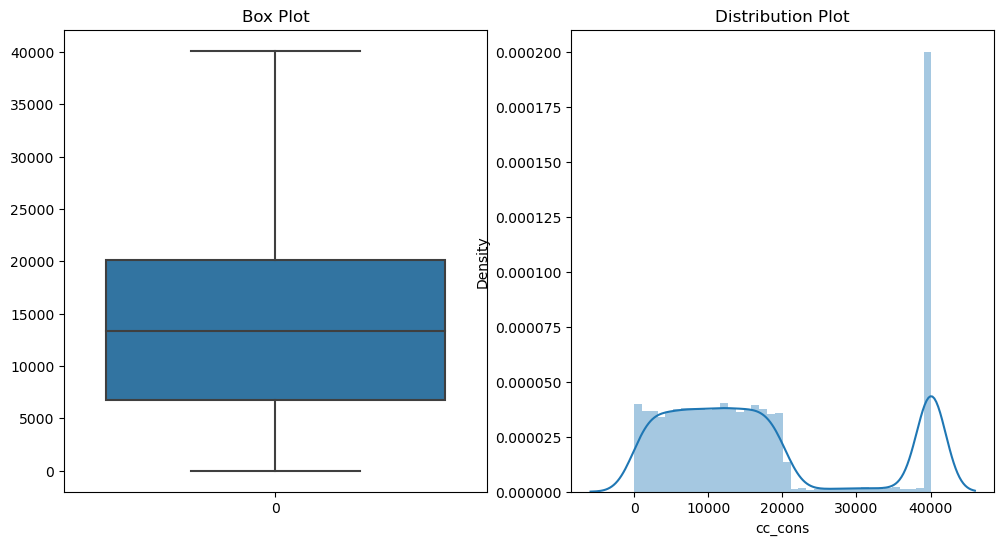

In [252]:
plot_box_dist(df['cc_cons'], df['cc_cons'])

In [253]:
df['age'] = handling_outlier(df.age) # Aplying the outlier udf for handling outlier in Age feature

In [254]:
df['age'].skew() # Now the skew value is near to zero

0.874441950938215

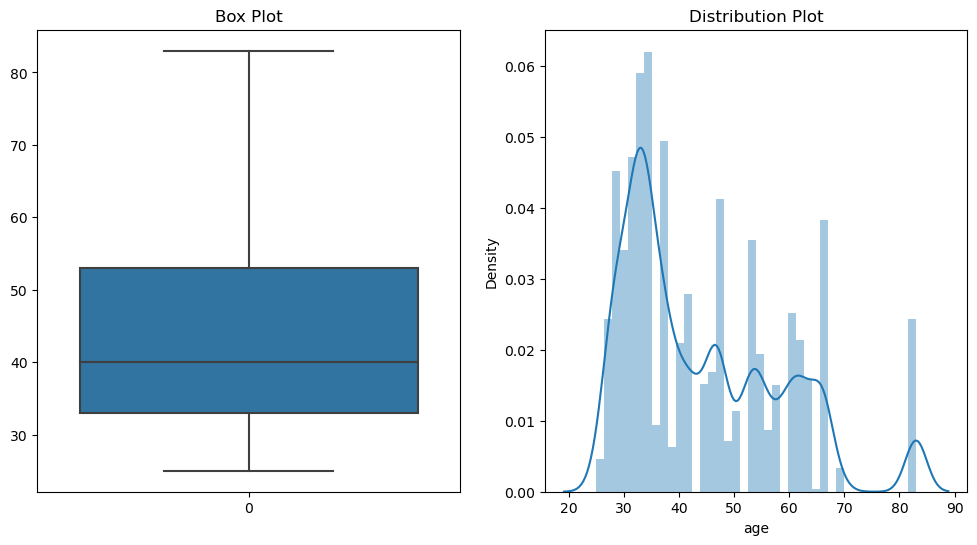

In [255]:
plot_box_dist(df['age'], df['age'])

In [256]:
df.isnull().sum()

cc_cons                         5000
cc_cons_apr                        0
dc_cons_apr                        0
cc_cons_may                        1
dc_cons_may                        0
cc_cons_jun                        0
dc_cons_jun                        1
cc_count_apr                       1
cc_count_may                       0
cc_count_jun                       0
dc_count_apr                       0
dc_count_may                       0
dc_count_jun                       0
card_lim                           0
personal_loan_active               0
vehicle_loan_active                0
personal_loan_closed               1
vehicle_loan_closed                0
investment_1                       0
investment_2                       0
investment_3                       2
investment_4                       0
debit_amount_apr                   0
credit_amount_apr                  0
debit_count_apr                    1
credit_count_apr                   0
max_credit_amount_apr              0
d

In [257]:
# Fill the missing values with respective mean, and mode based on continous and categorical obervations.

df['cc_cons_may'] = df['cc_cons_may'].fillna(df.cc_cons_may.mean())
df['dc_cons_jun'] = df['dc_cons_jun'].fillna(df.dc_cons_jun.mean())
df['cc_count_apr'] = df['cc_count_apr'].fillna(df.cc_count_apr.mean())
df['personal_loan_closed'] = df['personal_loan_closed'].fillna(0)
df['investment_3'] = df['investment_3'].fillna(df.investment_3.mean())
df['emi_active'] = df['emi_active'].fillna(df.emi_active.mean())
df['debit_count_apr'] = df['debit_count_apr'].fillna(df.debit_count_apr.mean())                 
df['Avg_days_between_transaction'] = df['Avg_days_between_transaction'].fillna(df.Avg_days_between_transaction.mode()[0])
#Assuming the loan enq are missing considered as 'N'
df['loan_enq'] = df['loan_enq'].fillna('N')
df['region_code'] = df['region_code'].fillna(df.region_code.mode()[0])
df['account_type'] = df['account_type'].fillna(df.account_type.mode()[0])
df['gender'] = df['gender'].fillna(df.gender.mode()[0])
df['Income'] = df['Income'].fillna(df.Income.mode()[0])

In [258]:
# Feature Engineering:

#1. Merging the features means of 'cc_cons_apr', 'cc_cons_may', 'cc_cons_jun' to old_cc_cons, 'dc_cons_apr'', 'dc_cons_may', 'dc_cons_jun to dc_cons,
    #cc_count_apr', 'cc_count_may', 'cc_count_jun to cc_count, 'dc_count_apr', 'dc_count_may', 'dc_count_jun'' to dc_count, 
    #'credit_amount_apr', 'credit_amount_may', 'credit_amount_jun' to credit_amount,
    #'debit_amount_apr', 'debit_amount_may', 'debit_amount_jun' to debit_amount,
    #'debit_count_apr', 'debit_count_may', 'debit_count_jun' to debit_count,
    #'credit_count_apr', 'credit_count_may', 'credit_count_jun' to credit_count,
    #'max_credit_amount_apr', 'max_credit_amount_may', 'max_credit_amount_jun' to max_credit_amount,
#2. Sum the features observations and create a new feature. 'investment_1', 'investment_2', 'investment_3', 'investment_4' to investment
    #'personal_loan_active', 'vehicle_loan_active' to 'total_active_loan'
    #'personal_loan_closed', 'vehicle_loan_closed' to 'total_closed_loan'

In [259]:
# Summing up the columns

In [260]:
df['old_cc_cons'] = df[['cc_cons_apr', 'cc_cons_may', 'cc_cons_jun']].mean(axis=1)
df['dc_cons'] = df[['dc_cons_apr', 'dc_cons_may', 'dc_cons_jun']].mean(axis=1)
df['cc_count'] = df[['cc_count_apr', 'cc_count_may', 'cc_count_jun']].mean(axis=1)
df['dc_count'] = df[['dc_count_apr', 'dc_count_may', 'dc_count_jun']].mean(axis=1)
df['credit_amount'] = df[['credit_amount_apr', 'credit_amount_may', 'credit_amount_jun']].mean(axis=1)
df['debit_amount'] = df[['debit_amount_apr', 'debit_amount_may', 'debit_amount_jun']].mean(axis=1)
df['debit_count'] = df[['debit_count_apr', 'debit_count_may', 'debit_count_jun']].mean(axis=1)
df['credit_count'] = df[['credit_count_apr', 'credit_count_may', 'credit_count_jun']].mean(axis=1)
df['max_credit_amount'] = df[['max_credit_amount_apr', 'max_credit_amount_may', 'max_credit_amount_jun']].mean(axis=1)
df['investment'] = df[['investment_1', 'investment_2', 'investment_3', 'investment_4']].sum(axis=1)
df['total_active_loan'] = df[['personal_loan_active', 'vehicle_loan_active']].sum(axis=1)
df['total_closed_loan'] = df[['personal_loan_closed', 'vehicle_loan_closed']].sum(axis=1)

In [261]:
df.drop(columns=['cc_cons_apr', 'cc_cons_may', 'cc_cons_jun', 'dc_cons_apr', 'dc_cons_may', 'dc_cons_jun', 
 'cc_count_apr', 'cc_count_may', 'cc_count_jun',
'dc_count_apr', 'dc_count_may', 'dc_count_jun',
'credit_amount_apr', 'credit_amount_may', 'credit_amount_jun',
'debit_amount_apr', 'debit_amount_may', 'debit_amount_jun',
'credit_count_apr', 'credit_count_may', 'credit_count_jun',
'debit_count_apr', 'debit_count_may', 'debit_count_jun',
'max_credit_amount_apr', 'max_credit_amount_may', 'max_credit_amount_jun',
'investment_1', 'investment_2', 'investment_3', 'investment_4',
'personal_loan_active', 'vehicle_loan_active',
'personal_loan_closed', 'vehicle_loan_closed'], inplace=True)

In [262]:
df.drop(columns=['Avg_days_between_transaction', 'region_code', 'NetBanking_Flag', 'Emp_Tenure_Years', 'Tenure_with_Bank', 'Income'], inplace=True) 

In [263]:
#Converting Categorical variables to Numeric values

In [264]:
df.isnull().sum()

cc_cons              5000
card_lim                0
emi_active              0
age                     0
loan_enq                0
account_type            0
gender                  0
old_cc_cons             0
dc_cons                 0
cc_count                0
dc_count                0
credit_amount           0
debit_amount            0
debit_count             0
credit_count            0
max_credit_amount       0
investment              0
total_active_loan       0
total_closed_loan       0
dtype: int64

In [265]:
df['total_active_loan'].value_counts()

2    20000
Name: total_active_loan, dtype: int64

In [266]:
df.columns

Index(['cc_cons', 'card_lim', 'emi_active', 'age', 'loan_enq', 'account_type',
       'gender', 'old_cc_cons', 'dc_cons', 'cc_count', 'dc_count',
       'credit_amount', 'debit_amount', 'debit_count', 'credit_count',
       'max_credit_amount', 'investment', 'total_active_loan',
       'total_closed_loan'],
      dtype='object')

In [267]:
le = LabelEncoder()

In [268]:
df['loan_enq'] = le.fit_transform(df['loan_enq'])
df['account_type'] = le.fit_transform(df['account_type'])
df['gender'] = le.fit_transform(df['gender'])

### Separate Labelled and Unlabelled data

In [269]:
df1 = df[df['cc_cons'].notna()]

In [270]:
df1.shape

(15000, 19)

In [271]:
df1 = df1[['card_lim', 'emi_active', 'age', 'loan_enq', 'account_type',
       'gender', 'old_cc_cons', 'dc_cons', 'cc_count', 'dc_count',
       'credit_amount', 'debit_amount', 'debit_count', 'credit_count',
       'max_credit_amount', 'investment', 'total_active_loan',
       'total_closed_loan', 'cc_cons']]

In [272]:
df_test = df[df['cc_cons'].isna()]

In [273]:
df_test.shape

(5000, 19)

In [274]:
df_test.drop(columns='cc_cons', inplace=True)

In [275]:
df_test.shape

(5000, 18)

In [276]:
df1.columns

Index(['card_lim', 'emi_active', 'age', 'loan_enq', 'account_type', 'gender',
       'old_cc_cons', 'dc_cons', 'cc_count', 'dc_count', 'credit_amount',
       'debit_amount', 'debit_count', 'credit_count', 'max_credit_amount',
       'investment', 'total_active_loan', 'total_closed_loan', 'cc_cons'],
      dtype='object')

In [277]:
df_test.columns

Index(['card_lim', 'emi_active', 'age', 'loan_enq', 'account_type', 'gender',
       'old_cc_cons', 'dc_cons', 'cc_count', 'dc_count', 'credit_amount',
       'debit_amount', 'debit_count', 'credit_count', 'max_credit_amount',
       'investment', 'total_active_loan', 'total_closed_loan'],
      dtype='object')

### Split the dataset into train-test

In [278]:
X = df1.iloc[:, :-1]
Y = df1.loc[:, 'cc_cons']

In [279]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=1)

In [280]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((12000, 18), (3000, 18), (12000,), (3000,))

### Model Building

In [281]:
models=[LinearRegression(), DecisionTreeRegressor(), AdaBoostRegressor(), RandomForestRegressor(), SVR(), Lasso(), Ridge(), BaggingRegressor(), GradientBoostingRegressor(), KNeighborsRegressor()]

model_names=['Linear Regression' ,'DecisionTreeRegressor', 'AdaBoostRegressor', 'RandomForestRegressor', 'SVR', 'Lasso', 'Ridge', 'BaggingRegressor', 'GradientBoostingRegressor', 'KNeighborsRegressor']


rmse=[]
mae=[]
mape=[]
mse=[]
r2s=[]
d={}
lst={}

for model in models:
    clf=model
    clf.fit(x_train,y_train)
    y_pred=clf.predict(x_test)
    rmse.append(np.sqrt(np.mean(np.square(np.log1p(y_pred) - np.log1p(y_test)))))
    
d={'Modelling_Algo':model_names,'RMSE':rmse}

### Metrics Evaluation

In [282]:
rmse_df = pd.DataFrame(d)

In [283]:
rmse_df

,Modelling_Algo,RMSE
0,Linear Regression,1.221558
1,DecisionTreeRegressor,1.589258
2,AdaBoostRegressor,1.281079
3,RandomForestRegressor,1.237368
4,SVR,1.159413
5,Lasso,1.221558
6,Ridge,1.221560
7,BaggingRegressor,1.246144
8,GradientBoostingRegressor,1.219714
9,KNeighborsRegressor,1.259058


### Model Selection for value prediction

<Axes: xlabel='RMSE', ylabel='Modelling_Algo'>

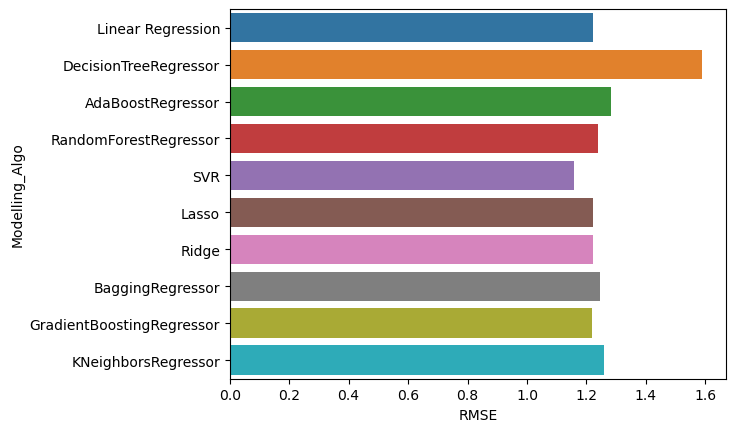

In [284]:
sns.barplot(data=rmse_df, x='RMSE', y='Modelling_Algo')

<Axes: xlabel='RMSE', ylabel='Modelling_Algo'>

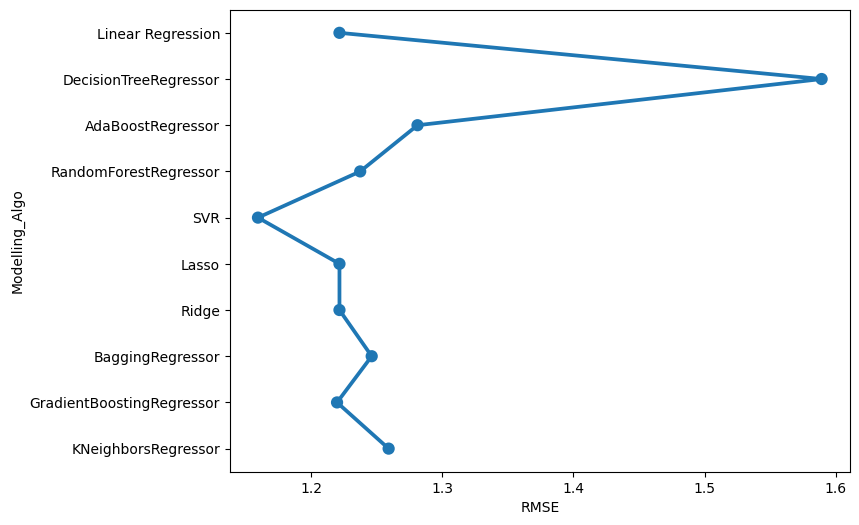

In [285]:
plt.figure(figsize=(8, 6))
sns.pointplot(data=rmse_df, x='RMSE', y='Modelling_Algo')

### Predict Values with selected model

In [286]:
# SVR has a least RMSE score to we will go with SVR for predict values

In [287]:
from sklearn.svm import SVR

In [288]:
svr = SVR(kernel='rbf')

In [289]:
svr.fit(x_train, y_train)

SVR()

In [290]:
sv_y_pred = svr.predict(df_test)

In [291]:
submission_df= pd.DataFrame({
        "id": df_test_ID,
        "cc_cons": sv_y_pred
    })

In [292]:
submission_df = sub_svr.reset_index(drop=True)

In [293]:
submission_df

,id,cc_cons
0,17591,13349.244300
1,13541,13349.931279
2,13431,13350.408659
3,8687,13348.904968
4,14727,13382.299115
...,...,...
4995,12512,13350.979164
4996,14224,13361.929316
4997,18740,13349.114663
4998,18134,13348.592378


In [294]:
submission_df.to_csv("submission.csv", index= False)

In [295]:
sb = pd.read_csv("submission.csv")

In [296]:
sb

,id,cc_cons
0,17591,13349.244300
1,13541,13349.931279
2,13431,13350.408659
3,8687,13348.904968
4,14727,13382.299115
...,...,...
4995,12512,13350.979164
4996,14224,13361.929316
4997,18740,13349.114663
4998,18134,13348.592378
